# 1. CatBoost Algorithm
- `CatBoost` is state-of-the-art open-source gradient boosting on decision trees library. 

- It is developed by `Yandex` researchers and engineers, and is used to search, recommendation systems,  personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies.

- It is in `Python` and it is designed to be integrated in data science pipelines.

- It provides state-of-the-art results and it is powerful in handling catergorical features. 

- CatBoost does not require to encode the `Categorical Featuers`.

- It is efficient. It provides a fast and scalable multi-threaded implementation of the algorithm. 

- It provides visualization tools to understand the model.

In [46]:
# %pip install catboost --q

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [48]:
# IMport dataset of titanic
df = pd.read_csv('titanic.csv')
df.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## Data Preprocessing

In [49]:
# df.isnull().sum()
df.isnull().sum().sort_values(ascending=False)

# It will show the numbers of empty values in eac column sorted by Decending order

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [50]:
# NOW We need to impute those missing values using KNN Imputer in 'age' column
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['age'] = imputer.fit_transform(df[['age']])


# Similarly, we can impute missing values in 'embarked' column using most frequent value 'mode' 
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])    # [0] here is used to get the first mode value

# Similarly, we can impute missing values in 'embarked town' column using most frequent value 'mode'
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])    # [0] here is used to get the first mode value


# AND, we can remove/drop the 'deck' column as it has too many missing values
df.drop('deck', axis=1, inplace=True)

# NOW let's check again for missing values in the dataset
df.isnull().sum().sort_values(ascending=False)


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [51]:
df.info()       # To check the data types of each column  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB


In [52]:
df = df.drop(['alive'], axis=1)   # Dropping 'alive' column as it is redundant/repetitive with 'survived' column

# convert each categorical/object column to 'category' data type
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# AND add this as a new column in the dataframe
df[categorical_cols] = df[categorical_cols].astype('category')

In [53]:
# NOW let's see the datatypes of all the columns again
df.dtypes

survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male         bool
embark_town    category
alone              bool
dtype: object

#### Split the data into $X$ and $y$

In [55]:
X = df.drop('survived', axis=1)
y = df['survived']


# Split the data into 'train_test_split' 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### CatBoost Model 

In [60]:
# Run the catboost classifier
model = CatBoostClassifier(iterations=100, learning_rate=0.01, depth=3, loss_function='Logloss', 
                        eval_metric='Accuracy', random_seed=42, verbose=False)


# Train the model
model.fit(X_train, y_train, cat_features=categorical_cols.tolist())


# Predictions
y_pred = model.predict(X_test)


In [63]:
# Evalute the Model
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')
print(f'Confusion Matrix: \n {classification_report(y_test, y_pred)}')

Accuracy Score: 0.8044692737430168
Confusion Matrix: 
 [[90 15]
 [20 54]]
Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Text(0.5, 1.0, 'Confusion Matrix')

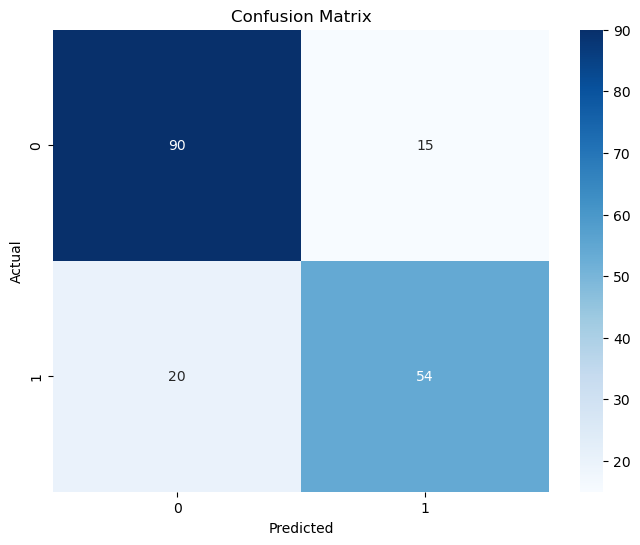

In [64]:
# NOW Plot the Confusion Matrix 
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

#### Feature Importance

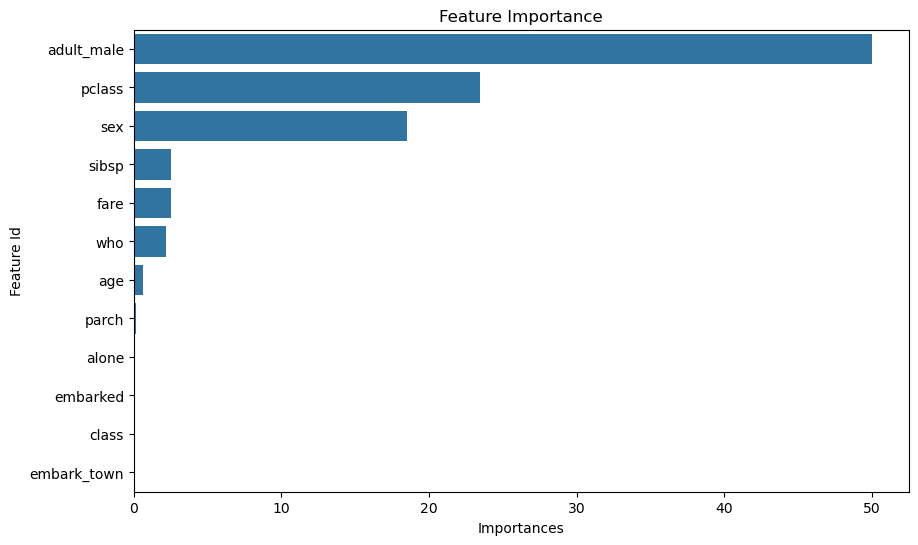

In [68]:
feature_importance = model.get_feature_importance(prettified=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importances', y='Feature Id', data=feature_importance)
plt.title('Feature Importance')
plt.show()